# Netflix Originals Analysis

This analysis was inspired by this dataset: https://data.world/mattschroyer/netflix-original-series 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates
import numpy as np

In [2]:
# Read in Data from Data.World
nflx_originals = pd.read_excel('https://query.data.world/s/f5336e3mv6tm4drlpsolmk3ujy2cl4')
nflx_originals['Premiere Date'] = pd.to_datetime(nflx_originals['Premiere Date']).dt.date

In [3]:
print("The Dataset has",nflx_originals.shape[0],"Observations and", nflx_originals.shape[1], "Features")

The Dataset has 109 Observations and 12 Features


In [4]:
nflx_originals.head()

,Major_Genre,Title,Subgenre,Premiere Date,Premiere_Year,Seasons,Status,Min_Length,Max_Length,Seasons.1,Episodes,IMDB_Rating
0,Animation,Star Wars: The Clone Wars (season 6),Animation,2014-03-07,2014,"1 season, 13 episodes",Ended,22,22,1,13,80
1,Comedy,Arrested Development (season 4),Comedy,2013-05-26,2013,"1 season, 15 episodes",Renewed,28,37,1,15,89
2,Comedy,Russell Peters vs. the World,Docu-Series,2013-10-03,2013,"1 season, 4 episodes",Ended,26,29,1,4,60
3,Comedy,BoJack Horseman,Adult Animation,2014-08-22,2014,"3 seasons, 36 episodes",Renewed,25,26,3,36,84
4,Comedy,"Trailer Park Boys (seasons 8, 9, 10 and 11)",Mockumentary,2014-09-05,2014,"4 seasons, 40 episodes",Pending,22,32,4,40,85


In [5]:
start_date = nflx_originals['Premiere Date'].min()
end_date = nflx_originals['Premiere Date'].max()
print("This Data is from",start_date,"to",end_date)

This Data is from 2013-02-01 to 2017-05-19


# Netflix Originals over time

How many Netflix Originals Premier each month? How has that trend changed over time?

In [6]:
yearly_counts = nflx_originals["Premiere_Year"].value_counts()
yearly_counts

2016    45
2017    26
2015    24
2014     7
2013     7
Name: Premiere_Year, dtype: int64

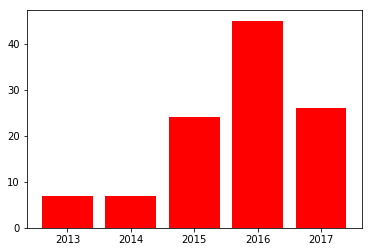

In [7]:
# Create bars
plt.bar(yearly_counts.index, yearly_counts.values, facecolor='red')
 
# Create names on the x-axis
plt.xticks(yearly_counts.index)
 
# Show graphic
plt.show()

Since the data doesnt include the full 2017 it is easier to show the trend by looking at a month by month over time chart

In [8]:
nflx_originals['Month_Year'] = nflx_originals['Premiere Date'].map(lambda x: x.strftime('%b-%y'))

In [9]:
month_year_categories = nflx_originals.sort_values("Premiere Date")["Month_Year"].unique()
month_year_categories

array(['Feb-13', 'Apr-13', 'May-13', 'Jul-13', 'Oct-13', 'Dec-13',
       'Mar-14', 'Aug-14', 'Sep-14', 'Nov-14', 'Dec-14', 'Jan-15',
       'Feb-15', 'Mar-15', 'Apr-15', 'May-15', 'Jun-15', 'Jul-15',
       'Aug-15', 'Sep-15', 'Oct-15', 'Nov-15', 'Dec-15', 'Jan-16',
       'Feb-16', 'Mar-16', 'Apr-16', 'May-16', 'Jun-16', 'Jul-16',
       'Aug-16', 'Sep-16', 'Oct-16', 'Nov-16', 'Dec-16', 'Jan-17',
       'Feb-17', 'Mar-17', 'Apr-17', 'May-17'], dtype=object)

Since not all months are included in our dataset in order to preserve time we will make a month range and set the values according to the counts from the dataset or a 0 if no originals were relased that month.

In [10]:
# create month-year range
all_months =  pd.date_range(start_date,end_date,freq='MS').strftime('%b-%y')
all_months_df = pd.DataFrame(0, index = all_months,columns=["values"])
all_months_df.head()

,values
Feb-13,0
Mar-13,0
Apr-13,0
May-13,0
Jun-13,0


In [11]:
month_year_counts = nflx_originals["Month_Year"].value_counts()
month_year_counts.head()

Mar-17    7
Dec-16    6
Oct-16    6
Apr-17    6
Nov-16    6
Name: Month_Year, dtype: int64

In [12]:
# fill all_months dataframe 
all_months_df["values"] = all_months_df.merge(right = month_year_counts,how = 'left', 
                                      left_index = True, right_index = True)["Month_Year"].fillna(0)
all_months_df.head()

,values
Feb-13,1.0
Mar-13,0.0
Apr-13,1.0
May-13,1.0
Jun-13,0.0


In [13]:
month_year_categories = all_months_df.index.values
# select values for display so we wont have too much overlap
month_year_categories_display = month_year_categories.copy()
i = 0
for monthYear in month_year_categories_display:
    if ("Jan" not in monthYear) and (i!=0):
        monthYear = ""
    month_year_categories_display[i] = monthYear
    i+=1
print(month_year_categories_display)
print(month_year_categories)

['Feb-13' '' '' '' '' '' '' '' '' '' '' 'Jan-14' '' '' '' '' '' '' '' ''
 '' '' '' 'Jan-15' '' '' '' '' '' '' '' '' '' '' '' 'Jan-16' '' '' '' ''
 '' '' '' '' '' '' '' 'Jan-17' '' '' '' '']
['Feb-13' 'Mar-13' 'Apr-13' 'May-13' 'Jun-13' 'Jul-13' 'Aug-13' 'Sep-13'
 'Oct-13' 'Nov-13' 'Dec-13' 'Jan-14' 'Feb-14' 'Mar-14' 'Apr-14' 'May-14'
 'Jun-14' 'Jul-14' 'Aug-14' 'Sep-14' 'Oct-14' 'Nov-14' 'Dec-14' 'Jan-15'
 'Feb-15' 'Mar-15' 'Apr-15' 'May-15' 'Jun-15' 'Jul-15' 'Aug-15' 'Sep-15'
 'Oct-15' 'Nov-15' 'Dec-15' 'Jan-16' 'Feb-16' 'Mar-16' 'Apr-16' 'May-16'
 'Jun-16' 'Jul-16' 'Aug-16' 'Sep-16' 'Oct-16' 'Nov-16' 'Dec-16' 'Jan-17'
 'Feb-17' 'Mar-17' 'Apr-17' 'May-17']


In [14]:
all_months_df.index = pd.CategoricalIndex(all_months_df.index, 
                               categories=month_year_categories, 
                               ordered=True)
all_months_df = all_months_df.sort_index()

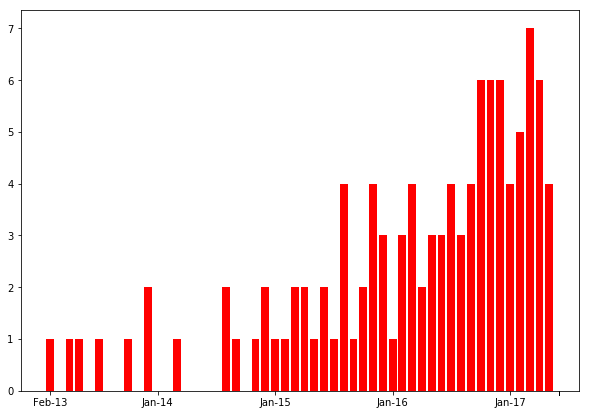

In [15]:
plt.subplots(figsize=(10,7))
# Create bars
plt.bar(all_months_df.index, all_months_df["values"].values, facecolor='red')
 
# Create names on the x-axis
plt.xticks(month_year_categories_display)

# Set title
#plt.title("Netflix Originals Premiers")

# Show graphic
plt.show()

## Helper Functions for Analysis


In [16]:
def column_analysis_df(df,col_name):
    col_counts = df[col_name].value_counts()
    col_mean_rating = df.groupby(col_name)["IMDB_Rating"].mean()
    col_avg_min_length = df.groupby(col_name)["Min_Length"].mean()
    col_avg_max_length = df.groupby(col_name)["Max_Length"].mean()
    col_avg_num_episodes = df.groupby(col_name)["Episodes"].mean()
    output_df = pd.concat([col_counts,
                          col_mean_rating,
                          col_avg_min_length,
                          col_avg_max_length,
                          col_avg_num_episodes],
                         axis = 1,sort=True)
    output_df = output_df.rename(columns={ col_name : "Count", 
                                        "IMDB_Rating": "Mean_Rating",
                                        "Min_Length" : "Mean_Min_Length",
                                        "Max_Length" : "Mean_Max_Length",
                                        "Episodes" : "Mean_Number_of_Episodes"
                                       })
    output_df = output_df.sort_values("Count",ascending = False)
    return output_df

# Yearly Analysis
How are ratings, lengths and number of episodes changing over time?

In [17]:
yearly_df = column_analysis_df(nflx_originals,"Premiere_Year").sort_index(ascending = False)
yearly_df

,Count,Mean_Rating,Mean_Min_Length,Mean_Max_Length,Mean_Number_of_Episodes
2017,26,71.807692,35.307692,43.192308,10.576923
2016,45,73.400000,33.911111,45.266667,12.800000
2015,24,73.750000,31.625000,38.458333,26.166667
2014,7,76.000000,31.000000,35.857143,31.285714
2013,7,78.000000,34.000000,49.000000,35.714286



It looks like the IMDB Ratings are declining as more shows are produced. Also it seems that more originals are being made for the 40-60 min timeframe.

In [18]:
premiers_yr = (yearly_df.Count/pd.Series(data = [12,12,12,12,6],index = [2013,2014,2015,2016,2017]))
premiers_yr.sort_index(ascending = False)

2017    4.333333
2016    3.750000
2015    2.000000
2014    0.583333
2013    0.583333
dtype: float64

This shows a clear increase in the number of Originals that are premiering per month from 2014 to 2017.

Text(0.5, 1.0, 'Premiers per Month')

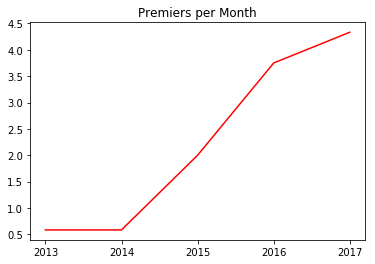

In [19]:
plt.xticks(premiers_yr.index, premiers_yr.index)
plt.plot(premiers_yr.index,premiers_yr.values,color = "r")
plt.title("Premiers per Month")


With the new average of 4.33 new shows per month I will project out the total for 2017 on a bar chart similar to the first bar chart I made

In [20]:
yearly_counts_projection = pd.DataFrame(yearly_counts).rename(columns={"Premiere_Year": "Actuals"}).sort_index()
# projection is just the 2017 monthly average x months left in the year (in this case it is 
# just the same as the first 6 months)
yearly_counts_projection["Projection"] = pd.Series({2017:premiers_yr.loc[2017]*6})

yearly_counts_projection

,Actuals,Projection
2013,7,NaN
2014,7,NaN
2015,24,NaN
2016,45,NaN
2017,26,26.0


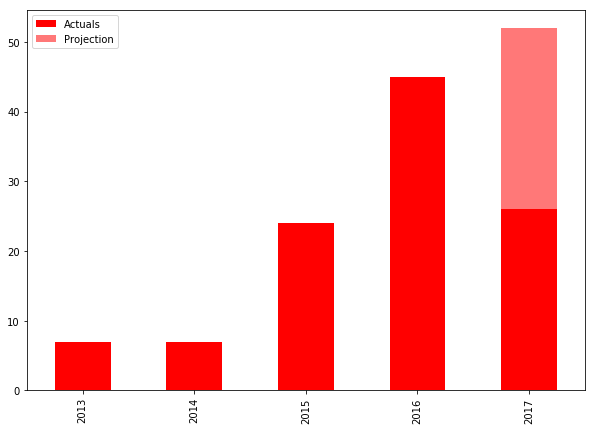

In [21]:
colors = ['red','#ff7878']
yearly_counts_projection.plot.bar(stacked=True, color=colors, figsize=(10,7))

Next lets see the IMDB ratings over time

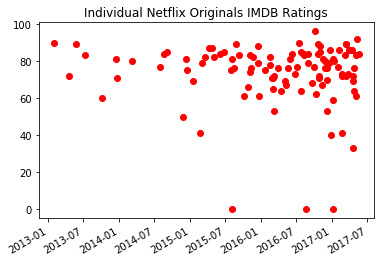

In [22]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

sorted_dates = nflx_originals.sort_values('Premiere Date')['Premiere Date']
IMDB_Ratings = nflx_originals.sort_values('Premiere Date')['IMDB_Rating']
fig, ax = plt.subplots()

ax.plot(sorted_dates, IMDB_Ratings,'ro')

# rotate and align the tick labels so they look better
fig.autofmt_xdate()

# Set title
ax.set_title("Individual Netflix Originals IMDB Ratings")

plt.show()

It looks like there are 3 points that are 0's those would really bring down any average we calculate. So first lets check that those 0 ratings make sense.

In [23]:
nflx_originals[nflx_originals["IMDB_Rating"]==0]

,Major_Genre,Title,Subgenre,Premiere Date,Premiere_Year,Seasons,Status,Min_Length,Max_Length,Seasons.1,Episodes,IMDB_Rating,Month_Year
31,Docu-Series,Fearless,Sport,2016-08-19,2016,"1 season, 6 episodes",Pending,50,58,1,6,0,Aug-16
84,Family Animation,We're Lalaloopsy,Animation,2017-01-10,2017,"1 season, 13 episodes",Pending,22,22,1,13,0,Jan-17
91,Family Live Action,Project Mc2,Comedy/educational,2015-08-07,2015,"3 seasons, 15 episodes",Renewed,22,29,3,15,0,Aug-15


For a manual check of those 3 shows IMDB seems to have a rating for all 3 above 0. In this case we could manually replace them with the correct answer but I will set them to NA since they seem to be errors and I would rather leave the data as it was collected since the ratings were all taken at a certain point in time and if we add ratings from a later date we should change the ratings for every other observation

In [24]:
nflx_originals = nflx_originals.replace(to_replace = 0,value = np.nan)

Now lets look at the new mean ratings. while there is a decrease in mean ratings there is a much less pronounced drop than before. 

In [25]:
# save the old ratings for comparison
old_rating = yearly_df.Mean_Rating 

In [26]:
yearly_df = column_analysis_df(nflx_originals,"Premiere_Year").sort_index(ascending = False)
yearly_df

,Count,Mean_Rating,Mean_Min_Length,Mean_Max_Length,Mean_Number_of_Episodes
2017,26,74.680000,35.307692,43.192308,10.576923
2016,45,75.068182,33.911111,45.266667,12.800000
2015,24,76.956522,31.625000,38.458333,26.166667
2014,7,76.000000,31.000000,35.857143,31.285714
2013,7,78.000000,34.000000,49.000000,35.714286


In [27]:
difference = yearly_df.Mean_Rating - old_rating
difference

2017    2.872308
2016    1.668182
2015    3.206522
2014    0.000000
2013    0.000000
Name: Mean_Rating, dtype: float64

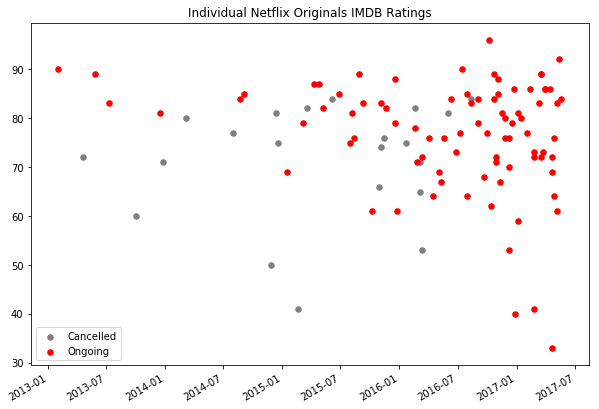

In [28]:
ended_mask = nflx_originals['Status'] == "Ended"

dates = nflx_originals['Premiere Date']
ratings = nflx_originals['IMDB_Rating']

ended_dates = dates[ended_mask]
ended_ratings = ratings[ended_mask]

not_ended_dates = dates[~ended_mask]
not_ended_ratings = ratings[~ended_mask]


fig, ax = plt.subplots(figsize=(10,7))

ax.scatter(ended_dates, ended_ratings,s = 30,color='grey', marker='o')
ax.scatter(not_ended_dates, not_ended_ratings, s = 30,color='red', marker='o')

# rotate and align the tick labels so they look better
fig.autofmt_xdate()

# Set title
ax.set_title("Individual Netflix Originals IMDB Ratings")
ax.legend(loc = 'lower left',labels = ["Cancelled","Ongoing"])
plt.show()

In [29]:
sorted_dates = nflx_originals.sort_values('Premiere Date')['Premiere Date']
cumulative_mean = nflx_originals.sort_values('Premiere Date')['IMDB_Rating'].expanding().mean()

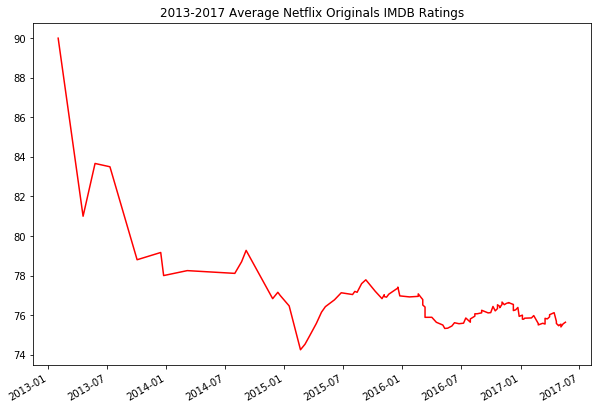

In [30]:
fig, ax = plt.subplots(figsize=(10,7))

ax.plot(sorted_dates, cumulative_mean,'red')

# rotate and align the tick labels so they look better
fig.autofmt_xdate()

# Set title
ax.set_title("2013-2017 Average Netflix Originals IMDB Ratings")

plt.show()

# High Rating Analysis
What are characteristics of high rating shows?

In [31]:
ratings_cut_df = nflx_originals.copy()
ratings_cut_df["rating_cut"] = pd.cut(ratings_cut_df.IMDB_Rating,[0,30,40,50,60,70,80,90,100])
ratings_cut_df["rating_cut"]
column_analysis_df(ratings_cut_df,"rating_cut").drop("Mean_Rating",axis = 1).sort_index(ascending = False)

,Count,Mean_Min_Length,Mean_Max_Length,Mean_Number_of_Episodes
"(90, 100]",2,21.500000,23.500000,9.000000
"(80, 90]",43,38.837209,50.976744,18.697674
"(70, 80]",36,31.916667,40.361111,16.416667
"(60, 70]",16,28.062500,36.312500,22.750000
"(50, 60]",4,33.500000,40.500000,7.000000
"(40, 50]",3,22.000000,22.666667,28.666667
"(30, 40]",2,26.500000,32.500000,11.500000
"(0, 30]",0,NaN,NaN,NaN


# Genre Analysis

What Genre's are netflix focusing on? How well do those categories score on IMDB?

In [32]:
column_analysis_df(nflx_originals,"Major_Genre").sort_values("Mean_Rating",ascending = False)

,Count,Mean_Rating,Mean_Min_Length,Mean_Max_Length,Mean_Number_of_Episodes
Drama,18,83.333333,49.777778,66.500000,20.111111
Animation,1,80.000000,22.000000,22.000000,13.000000
Marvel,4,79.500000,47.500000,60.000000,16.250000
Foreign Language,8,78.625000,34.125000,45.125000,11.750000
Docu-Series,14,78.153846,49.071429,59.714286,7.142857
Comedy,25,75.240000,27.880000,35.960000,16.640000
Family Animation,32,72.612903,21.843750,27.218750,22.687500
Family Live Action,3,65.000000,23.333333,28.666667,16.333333
Reality,2,56.500000,35.000000,46.500000,10.000000
Talk Show,2,50.000000,27.000000,36.000000,51.500000


From this table it is clear that Netflix is focusing on Family Animation, Comedy and Drama. They have produced the most of these but also have a lot of episodes of each with solid ratings.

# Status Analysis

What types of shows are Ended, Renewed or Pending? 

In [33]:
column_analysis_df(nflx_originals,"Status").sort_values("Mean_Rating", ascending = False)

,Count,Mean_Rating,Mean_Min_Length,Mean_Max_Length,Mean_Number_of_Episodes
Ongoing,4,79.500000,30.000000,38.250000,33.000000
Renewed,37,78.833333,34.972973,49.702703,17.351351
Pending,44,74.642857,31.295455,37.977273,17.181818
Ended,21,71.428571,34.761905,40.571429,18.952381


# Status Predictions

We dont have that many observations here but it would be interesting to try to predict if a show that is in the Pending status will be Renewed or Ended. This analysis is pretty simplistic because it will not take into account the reason a show was cancelled (sometimes good shows have a natural or planned number of episodes or seasons) and given the relatively short time horizon there will be plenty of shows that will be cancelled in the future for quality or user engagement reasons that still havent been ended yet due to the fact that they recently premiered. 


Given all of these drawbacks I would not expect this model to perform that well in making predictions but I still think that it can provide some insights into important features to predict if a show will be renewed or ended!

### Feature Creation

In [34]:
other_shows = nflx_originals[nflx_originals["Status"] != "Ongoing"]
print(other_shows["Major_Genre"].value_counts())

Family Animation      31
Comedy                24
Drama                 17
Docu-Series           14
Foreign Language       8
Marvel                 4
Family Live Action     3
Reality                2
Animation              1
Talk Show              1
Name: Major_Genre, dtype: int64


The Major Genre's are mostly focused around the top 4 values. Since we dont have that many observations the smaller Genres will be grouped into an "Other" category or into one of the related Genres

In [35]:
nflx_originals["Subgenre"].value_counts()

Animation                           33
Comedy                               8
Documentary                          5
Sitcom                               5
Comedy-drama                         4
Crime drama                          4
Historical drama                     3
Culinary art                         3
Political drama                      3
Drama                                3
Sketch comedy                        2
Talk Show                            2
Sport                                2
Science fiction                      2
Period drama                         2
Mockumentary                         2
Romantic comedy                      1
Comedy/educational                   1
Celebrity                            1
Science investigation                1
Neo-noir/psychological thriller      1
Docu-Series                          1
Romantic comedy anthology series     1
Educational                          1
Adult Animation                      1
Black-comedy mystery     

The Subgenre's are mostly focused around Animation. Since we dont have that many observations we will just use Subgenre_Animation as a binary value column

In [36]:
from sklearn.preprocessing import OneHotEncoder
def clean_and_select_features(df):
    """ 
    Clean Dataframe, One Hot Encode Categorical Data and return an ML ready DataFrame. 
  
    Parameters: 
    df (pd.DataFrame): Raw Netflix Originals Pandas Dataframe 
  
    Returns: 
    df_features: Feature DataFrame that is ready for input to a sklearn machine learning model 
  
    """
    df_features = df.copy().reset_index()
    
    # Fill NA Values with 0 (replace the NA's we added earlier with their original value)
    df_features = df_features.fillna(0)
    
    # replace low count genre's with "Other" for One Hot Encoding
    df_features["Major_Genre"] = df_features["Major_Genre"].replace("Animation","Other")
    df_features["Major_Genre"] = df_features["Major_Genre"].replace("Talk Show","Other")
    df_features["Major_Genre"] = df_features["Major_Genre"].replace("Reality","Other")
    df_features["Major_Genre"] = df_features["Major_Genre"].replace("Marvel","Other")
    df_features["Major_Genre"] = df_features["Major_Genre"].replace("Family Live Action","Other")
    
    # One Hot encode Major_Genre column
    encode_columns = ["Family Animation","Comedy", "Drama","Docu-Series","Foreign Language","Other"]
    header_columns = ["Major_Genre_" + s.replace(" ","_") for s in encode_columns]
    
    Genre_OHC = OneHotEncoder(handle_unknown = "ignore")
    Genre_OHC.fit(np.array(encode_columns).reshape(-1, 1))
    a = Genre_OHC.transform(df_features.Major_Genre.values.reshape(-1, 1)).toarray()
    
    genre_ohc_df = pd.DataFrame(a)
    genre_ohc_df = genre_ohc_df.rename(columns = {0 : header_columns[0],
                                                  1 : header_columns[1],
                                                  2 : header_columns[2],
                                                  3 : header_columns[3],
                                                  4 : header_columns[4],
                                                  5 : header_columns[5]})
    # Combine the One Hot Encoded Columns to the main df
    df_features = pd.concat([df_features,genre_ohc_df],axis = 1)
    
    # Create Manual One Hot Encoded values for Subgenre column
    df_features["Subgenre_Animation"] = df_features["Subgenre"] == "Animation"
    
    # Drop one hot encoded Columns
    df_features = df_features.drop(labels = ["Major_Genre","Subgenre"],axis = 1)
    
    # Drop Character Columns 
    df_features = df_features.drop(labels = ["Title",
                                             "index",
                                             "Premiere Date",
                                             "Seasons",
                                             "Month_Year"],axis = 1)
    return df_features

In [37]:
# Gather Known outcomes for shows (either renewed or ended)
renewed_shows = nflx_originals[nflx_originals["Status"]== "Renewed"]
ended_shows = nflx_originals[nflx_originals["Status"]== "Ended"]
known_outcomes = pd.concat([renewed_shows,ended_shows],axis = 0)
nflx_originals_features = clean_and_select_features(known_outcomes)
nflx_originals_features.head()

,Premiere_Year,Status,Min_Length,Max_Length,Seasons.1,Episodes,IMDB_Rating,Major_Genre_Family_Animation,Major_Genre_Comedy,Major_Genre_Drama,Major_Genre_Docu-Series,Major_Genre_Foreign_Language,Major_Genre_Other,Subgenre_Animation
0,2013,Renewed,28,37,1,15,89.0,1.0,0.0,0.0,0.0,0.0,0.0,False
1,2014,Renewed,25,26,3,36,84.0,1.0,0.0,0.0,0.0,0.0,0.0,False
2,2015,Renewed,25,35,3,39,82.0,1.0,0.0,0.0,0.0,0.0,0.0,False
3,2016,Renewed,27,40,2,22,78.0,1.0,0.0,0.0,0.0,0.0,0.0,False
4,2016,Renewed,25,36,2,26,71.0,1.0,0.0,0.0,0.0,0.0,0.0,False


In [38]:
# Make target column -> 1 if "Renewed" and -> 0 if "Ended"
target = nflx_originals_features.Status == "Renewed"
target.head()

0    True
1    True
2    True
3    True
4    True
Name: Status, dtype: bool

In [39]:
X = nflx_originals_features.drop("Status",axis = 1)

In [40]:
X.head()

,Premiere_Year,Min_Length,Max_Length,Seasons.1,Episodes,IMDB_Rating,Major_Genre_Family_Animation,Major_Genre_Comedy,Major_Genre_Drama,Major_Genre_Docu-Series,Major_Genre_Foreign_Language,Major_Genre_Other,Subgenre_Animation
0,2013,28,37,1,15,89.0,1.0,0.0,0.0,0.0,0.0,0.0,False
1,2014,25,26,3,36,84.0,1.0,0.0,0.0,0.0,0.0,0.0,False
2,2015,25,35,3,39,82.0,1.0,0.0,0.0,0.0,0.0,0.0,False
3,2016,27,40,2,22,78.0,1.0,0.0,0.0,0.0,0.0,0.0,False
4,2016,25,36,2,26,71.0,1.0,0.0,0.0,0.0,0.0,0.0,False


Split Data into training and test sets for analysis making sure to stratify on the target variable to keep the target percentages consistent

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=42, stratify = target)

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

lr_model = LogisticRegression(solver = 'liblinear',) # liblinear is a good solver for smaller datasets
lr_model.fit(X_train_scaled,y_train)
print("Prediction on Training Data:")
print(classification_report(y_train,lr_model.predict(X_train_scaled)))
print("Prediction on Test Data:")
print(classification_report(y_test,lr_model.predict(X_test_scaled)))

Prediction on Training Data:
              precision    recall  f1-score   support

       False       0.75      0.71      0.73        17
        True       0.83      0.86      0.85        29

    accuracy                           0.80        46
   macro avg       0.79      0.78      0.79        46
weighted avg       0.80      0.80      0.80        46

Prediction on Test Data:
              precision    recall  f1-score   support

       False       0.50      0.75      0.60         4
        True       0.83      0.62      0.71         8

    accuracy                           0.67        12
   macro avg       0.67      0.69      0.66        12
weighted avg       0.72      0.67      0.68        12



In [43]:
Feature_Weights = pd.DataFrame(lr_model.coef_[0]).set_index(X.columns).rename(columns = {0 : "Values"}).sort_values("Values")
Feature_Weights.iloc[(-np.abs(Feature_Weights['Values'].values)).argsort()]

,Values
Premiere_Year,0.991086
Subgenre_Animation,-0.934492
Episodes,0.810718
Min_Length,-0.770228
Max_Length,0.518744
Major_Genre_Other,0.502385
IMDB_Rating,0.361484
Seasons.1,-0.313406
Major_Genre_Comedy,-0.288363
Major_Genre_Drama,-0.163393


In [44]:
# Unkown outcomes that we would like to predict for 
pending_shows_features = nflx_originals[nflx_originals["Status"]== "Pending"]
pending_features_clean = clean_and_select_features(pending_shows_features).drop("Status",axis = 1)
print("Pending Shows that will be renewed:")
print(pd.Series(lr_model.predict(pending_features_clean)).value_counts())

Pending Shows that will be renewed:
True    44
dtype: int64


# Results

## Monthly Analysis

Netflix is stepping up their original content production and from 2013 to mid 2017 has gone from one show premier every other month

## Yearly Analysis

The average show rating per year premiered is declining as netflix is making more shows. 

## High Rating Analysis

There aren't any clear trends in show length or number of episodes for highly ranked shows.

## Genre Analysis

There are clear associations of genre's with IMDB ratings. This shows the areas that netflix is succeeding in with their original content. this seems to mostly be around Drama's, Marvel shows and Docu-Series. It would be interesting to see how this compares with other major content producers (Disney, Warner Media etc)

## Status Analysis

IMDB rating seems to have a correlation with the Status of the show and at a high level aligns with the various levels of Status from Ongoing to Ended. 

## Status Predictions

Despite not having much data to work with and using a simple model the accuracy in predicting the Status of a show is pretty decent. It would be interesting to get more general data on other companies and content to see how it can compare.

# Next Steps / Areas for Improvement

### Next Steps

1. I would like to extend analysis like this to other content creation companies like Disney or Warner Media
    - This would likely require building my own dataset through webscraping
    - This could allow me to pull ratings from other sources than IMDB as well as bring in new features like cost of production or Director/Cast information
1. I would like to see how my simple model performs on more recent data 
    - This would require me to extend the dataset through to 2019 which would probably have to be done through webscraping 
1. Since this analysis only covers series I would like to extend it to Movies as well since Netflix especially recently has been making more of those

### Areas for Improvement

1. This Analysis really lacks the ammount of Data that I would like to have (only 109 observations)
1. This Data has pretty limited feature information about a show
